In [42]:
# OPC data analysis procedure

In [43]:
# Version 7: 25 November 2020
# Nuno Canha
# Remarks: data treatment of OPC data from 2016 & correction for Stacked bar plot (or area plot, in this case)

In [44]:
# Create a working folder and enter in it:

In [45]:
# 1. Check which is the folder you are on using "pwd"

In [46]:
pwd

'C:\\Users\\Nuno Canha\\Desktop\\Python\\Dry deposition\\OPC data\\Python\\Flux\\Official analysis\\2017 - S6&OPC\\Step 0 - Calculation of OPC concentration'

In [47]:
#2. If you are not in your working folder, enter in it using the command "cd"

In [48]:
cd C:\Users\Nuno Canha\Desktop\Python\Dry deposition\OPC data\Python\Flux\Official analysis\2017 - S6&OPC\Step 0 - Calculation of OPC concentration

C:\Users\Nuno Canha\Desktop\Python\Dry deposition\OPC data\Python\Flux\Official analysis\2017 - S6&OPC\Step 0 - Calculation of OPC concentration


In [49]:
# Your raw data file should be "csv" type.
# Upload the analysis packages

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [51]:
# Basic x-y plot
# this command is for the graphs to appear in the notebook
%matplotlib inline

In [52]:
# Loading the data
name = input('Which data is being analised?')

Which data is being analised? OPC 2017


In [53]:
data = pd.read_csv("raw data.csv", delimiter=";", na_values=['0'])

# No values (0) were replaced by NaN in order to not interfere with the analysis

In [54]:
data

,Timestamp,Diameter,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,5.75,7.25,9,11,13,15,16.5
0,10/06/2017 18:44,Filter1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/06/2017 18:45,Filter1,53.0,10.0,8.0,4.0,6.0,7.0,14.0,6.0,1.0,5.0,1.0,NaN,3.0,NaN,NaN,NaN
2,10/06/2017 18:46,Filter1,57.0,15.0,11.0,8.0,5.0,10.0,8.0,9.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,10/06/2017 18:47,Filter1,59.0,12.0,12.0,5.0,4.0,7.0,8.0,5.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,10/06/2017 18:48,Filter1,64.0,7.0,7.0,10.0,4.0,1.0,13.0,8.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,28/06/2017 22:45,Filter4,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
26162,28/06/2017 22:46,Filter4,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
26163,28/06/2017 22:47,Filter4,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
26164,28/06/2017 22:48,Filter4,54.0,15.0,19.0,5.0,2.0,3.0,NaN,3.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [55]:
# Check if data is well defined (replacement of "0" values by NaN)

# This specific line has a value of "10", which means that the replacement of "0" by "NaN" worked.

data.loc[23082]

Timestamp    26/06/2017 19:26
Diameter              Filter4
0.46                      NaN
0.66                      NaN
0.89                      NaN
1.15                      NaN
1.45                      NaN
1.85                      NaN
2.55                      NaN
3.5                       NaN
4.5                       NaN
5.75                      NaN
7.25                      NaN
9                         NaN
11                        NaN
13                        NaN
15                        NaN
16.5                      NaN
Name: 23082, dtype: object

In [56]:
# TASK: create columns with "year", "month", "day" and "minute"

data['Timestamp'] = pd.to_datetime(data.Timestamp, format='%d/%m/%Y %H:%M')
data

,Timestamp,Diameter,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,5.75,7.25,9,11,13,15,16.5
0,2017-06-10 18:44:00,Filter1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-10 18:45:00,Filter1,53.0,10.0,8.0,4.0,6.0,7.0,14.0,6.0,1.0,5.0,1.0,NaN,3.0,NaN,NaN,NaN
2,2017-06-10 18:46:00,Filter1,57.0,15.0,11.0,8.0,5.0,10.0,8.0,9.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,2017-06-10 18:47:00,Filter1,59.0,12.0,12.0,5.0,4.0,7.0,8.0,5.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-06-10 18:48:00,Filter1,64.0,7.0,7.0,10.0,4.0,1.0,13.0,8.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,2017-06-28 22:45:00,Filter4,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
26162,2017-06-28 22:46:00,Filter4,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
26163,2017-06-28 22:47:00,Filter4,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
26164,2017-06-28 22:48:00,Filter4,54.0,15.0,19.0,5.0,2.0,3.0,NaN,3.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [57]:
# How to select a specific subset of data:

# Example: to start after 11/06 in order to avoid abnormal high values in the test dataset

data1=data[(data['Timestamp'] > '2017-06-11 00:00:00')]
data1

,Timestamp,Diameter,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,5.75,7.25,9,11,13,15,16.5
317,2017-06-11 00:01:00,Filter1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,2017-06-11 00:02:00,Filter1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,2017-06-11 00:03:00,Filter1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,2017-06-11 00:04:00,Filter1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,2017-06-11 00:05:00,Filter1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,2017-06-28 22:45:00,Filter4,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
26162,2017-06-28 22:46:00,Filter4,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
26163,2017-06-28 22:47:00,Filter4,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
26164,2017-06-28 22:48:00,Filter4,54.0,15.0,19.0,5.0,2.0,3.0,NaN,3.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [58]:
# Create collumns with year, month, day, hour and minute:
data['YEAR']=data['Timestamp'].dt.year
data['MONTH']=data['Timestamp'].dt.month
data['DAY']=data['Timestamp'].dt.day
data['HOUR']=data['Timestamp'].dt.hour
data['MINUTE']=data['Timestamp'].dt.minute
data

,Timestamp,Diameter,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,...,9,11,13,15,16.5,YEAR,MONTH,DAY,HOUR,MINUTE
0,2017-06-10 18:44:00,Filter1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017,6,10,18,44
1,2017-06-10 18:45:00,Filter1,53.0,10.0,8.0,4.0,6.0,7.0,14.0,6.0,...,NaN,3.0,NaN,NaN,NaN,2017,6,10,18,45
2,2017-06-10 18:46:00,Filter1,57.0,15.0,11.0,8.0,5.0,10.0,8.0,9.0,...,1.0,NaN,NaN,NaN,NaN,2017,6,10,18,46
3,2017-06-10 18:47:00,Filter1,59.0,12.0,12.0,5.0,4.0,7.0,8.0,5.0,...,NaN,NaN,NaN,NaN,NaN,2017,6,10,18,47
4,2017-06-10 18:48:00,Filter1,64.0,7.0,7.0,10.0,4.0,1.0,13.0,8.0,...,NaN,NaN,NaN,NaN,NaN,2017,6,10,18,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,2017-06-28 22:45:00,Filter4,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,2017,6,28,22,45
26162,2017-06-28 22:46:00,Filter4,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,...,NaN,NaN,NaN,NaN,NaN,2017,6,28,22,46
26163,2017-06-28 22:47:00,Filter4,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,2017,6,28,22,47
26164,2017-06-28 22:48:00,Filter4,54.0,15.0,19.0,5.0,2.0,3.0,NaN,3.0,...,1.0,NaN,NaN,NaN,NaN,2017,6,28,22,48


In [59]:
data2=data[(data['Timestamp'] > '2017-06-11 00:00:00')]
data2

,Timestamp,Diameter,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,...,9,11,13,15,16.5,YEAR,MONTH,DAY,HOUR,MINUTE
317,2017-06-11 00:01:00,Filter1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017,6,11,0,1
318,2017-06-11 00:02:00,Filter1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017,6,11,0,2
319,2017-06-11 00:03:00,Filter1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017,6,11,0,3
320,2017-06-11 00:04:00,Filter1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017,6,11,0,4
321,2017-06-11 00:05:00,Filter1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017,6,11,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,2017-06-28 22:45:00,Filter4,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,2017,6,28,22,45
26162,2017-06-28 22:46:00,Filter4,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,...,NaN,NaN,NaN,NaN,NaN,2017,6,28,22,46
26163,2017-06-28 22:47:00,Filter4,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,2017,6,28,22,47
26164,2017-06-28 22:48:00,Filter4,54.0,15.0,19.0,5.0,2.0,3.0,NaN,3.0,...,1.0,NaN,NaN,NaN,NaN,2017,6,28,22,48


In [60]:
# Set the timestamp as index:
data2 = data2.set_index('Timestamp')

In [61]:
data2 = data2.drop('Diameter', 1)
data2

,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,5.75,...,9,11,13,15,16.5,YEAR,MONTH,DAY,HOUR,MINUTE
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-06-11 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017,6,11,0,1
2017-06-11 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017,6,11,0,2
2017-06-11 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017,6,11,0,3
2017-06-11 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017,6,11,0,4
2017-06-11 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017,6,11,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 22:45:00,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017,6,28,22,45
2017-06-28 22:46:00,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,2017,6,28,22,46
2017-06-28 22:47:00,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,2017,6,28,22,47


In [62]:
# Check all data with graphs:

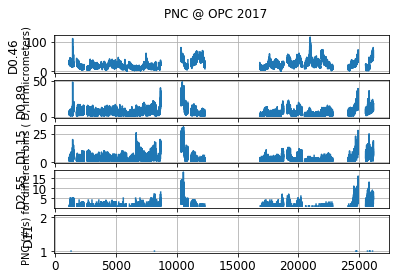

In [63]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]

fig1.text(0.05, 0.5,'PNC (#/s) for different bins ( D, in micrometers)', va='center', rotation='vertical')

fig1.suptitle('PNC @ ' + name)

import matplotlib.ticker as mtick

ax1.plot(data1['0.46'])
ax1.set_ylabel('D0.46', fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(True)

ax2.plot(data1['0.89'])
ax2.set_ylabel('D0.89', fontsize=12)
ax2.tick_params(axis='x', labelsize=12 )
ax2.tick_params(axis='y', labelsize=12 )
ax2.grid(True)

ax3.plot(data1['1.15'])
ax3.set_ylabel('D1.15', fontsize=12)
ax3.tick_params(axis='x', labelsize=12 )
ax3.tick_params(axis='y', labelsize=12 )
ax3.grid(True)

ax4.plot(data1['2.55'])
ax4.set_ylabel('D2.55', fontsize=12)
ax4.tick_params(axis='x', labelsize=12 )
ax4.tick_params(axis='y', labelsize=12 )
ax4.grid(True)

ax5.plot(data1['11'])
ax5.set_ylabel('D11', fontsize=12)
ax5.tick_params(axis='x', labelsize=12 )
ax5.tick_params(axis='y', labelsize=12 )
ax5.grid(True)

# To save the figure
plt.savefig('Fig1 - Particle number concentrations in different bins @ ' + name)

In [64]:
# Resample to hourly data:

Hourly = data2[['0.46','0.66','0.89','1.15','1.45','1.85','2.55','3.5','4.5','5.75','7.25','9','11','13','15','16.5']].resample('H').agg(['mean'])

Hourly

,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,5.75,7.25,9,11,13,15,16.5
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Timestamp,,,,,,,,,,,,,,,,
2017-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,13.00,8.000000,10.000000,12.000000,3.000000,4.000000,2.000000,2.000000,1.000000,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2017-06-28 19:00:00,39.75,12.604167,10.166667,5.395833,3.222222,4.229167,3.543478,1.891892,1.250000,1.521739,1.000000,1.000000,1.0,NaN,1.0,NaN


In [65]:
# This will only give the sum of counts per bin
Hourly['0.38-0.54']=Hourly['0.46']
Hourly['0.54-1']= Hourly['0.66']+Hourly['0.89']
Hourly['1-2.1']=Hourly['1.15']+Hourly['1.45']+Hourly['1.85']
Hourly['2.1-5']=Hourly['2.55']+Hourly['3.5']+Hourly['4.5']
Hourly['5-10']=Hourly['5.75']+Hourly['7.25']+Hourly['9']
Hourly['>10']=Hourly['11']+Hourly['13']+Hourly['15']+Hourly['16.5']
Hourly

,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,5.75,...,11,13,15,16.5,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,>10
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,,,,,,
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,13.00,8.000000,10.000000,12.000000,3.000000,4.000000,2.000000,2.000000,1.000000,NaN,...,1.0,NaN,NaN,NaN,13.00,18.000000,19.000000,5.000000,NaN,NaN
2017-06-28 19:00:00,39.75,12.604167,10.166667,5.395833,3.222222,4.229167,3.543478,1.891892,1.250000,1.521739,...,1.0,NaN,1.0,NaN,39.75,22.770833,12.847222,6.685370,3.521739,NaN


In [66]:
# Create a stacked collumn graph with different sizes


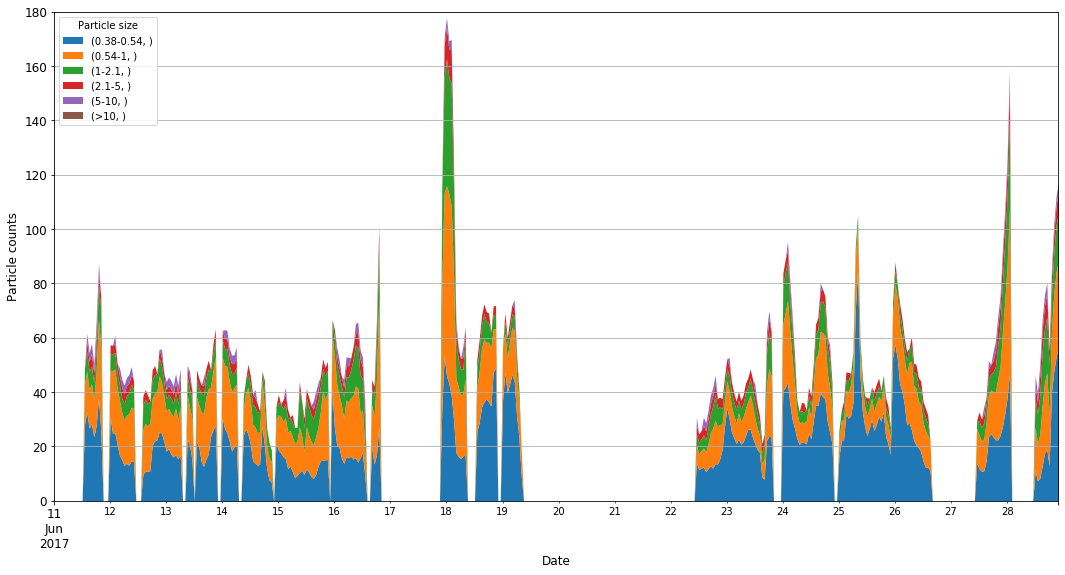

In [67]:
# To save the figure

fig2a = Hourly[['0.38-0.54','0.54-1','1-2.1','2.1-5','5-10','>10']].plot.area(linewidth=0)
fig2a.set_xlabel('Date',fontsize=12)
fig2a.set_ylabel('Particle counts', fontsize=12)
fig2a.grid(True)
fig2a.legend(title='Particle size')
fig2a.tick_params(axis='x', labelsize=12 )
fig2a.tick_params(axis='y', labelsize=12 )
fig2a.set_ylim(0,180)
    
plt.savefig('Fig2a - Particle number concentrations during monitoring period @ ' + name)

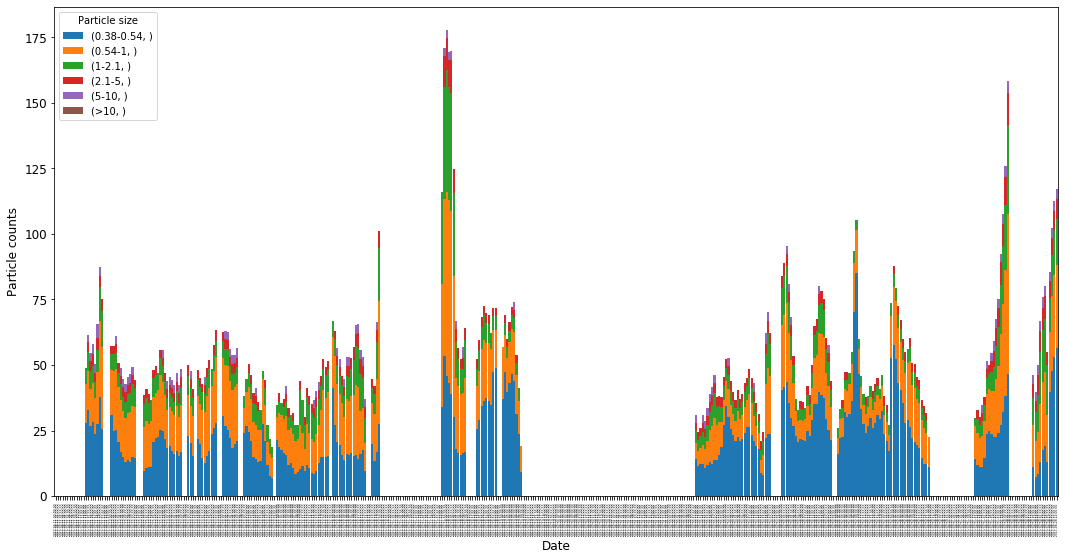

In [68]:
# Or:

Hourly=Hourly.reset_index()
Hourly['Date'] = Hourly['Timestamp'].astype('datetime64')
Hourly = Hourly.set_index('Date')

fig2b = Hourly[['0.38-0.54','0.54-1','1-2.1','2.1-5','5-10','>10']].plot(kind = 'bar', stacked = True, width=0.95)
fig2b.set_xlabel('Date',fontsize=12)
fig2b.set_ylabel('Particle counts', fontsize=12)

fig2b.legend(title='Particle size')
fig2b.tick_params(axis='x', labelsize=3 )
fig2b.tick_params(axis='y', labelsize=12 )

plt.savefig('Fig2b - Particle number concentrations during monitoring period @ ' + name)

In [69]:
# Calculation of concentration of particles (microg/m3)

# Assumed density of dust particles:

dens = 2500 # microg/m3

flux = 0.00022 # in m3/min (flux of the OPC monioring device)

import math as math # This will import Math constants, such as pi value

In [70]:
# Calculation of particle's volume considering a perfect sphere

def vol(D):
    """
    Function to calculate the volume of a particle considering it as a sphere (in m3)
    Parameters
    -------
    : int | float
        Input diameter in micrometers (should be a number)
    Returns
    -------
    volume (in m3) (float)
    """
    
    # Calculation of volume in m3 and return it
    volume_result = (math.pi*(D**3))/6
    return volume_result

In [71]:
vol(0.46)

0.050965010421636016

In [72]:
vol(1)

0.5235987755982988

In [73]:
# Calculation of concentration of particles

# Concentration = (counts * volume * density) / flux

In [74]:
Hourly

,Timestamp,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,...,11,13,15,16.5,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,>10
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-11 00:00:00,2017-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 01:00:00,2017-06-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 02:00:00,2017-06-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 03:00:00,2017-06-11 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 04:00:00,2017-06-11 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,2017-06-28 18:00:00,13.00,8.000000,10.000000,12.000000,3.000000,4.000000,2.000000,2.000000,1.000000,...,1.0,NaN,NaN,NaN,13.00,18.000000,19.000000,5.000000,NaN,NaN
2017-06-28 19:00:00,2017-06-28 19:00:00,39.75,12.604167,10.166667,5.395833,3.222222,4.229167,3.543478,1.891892,1.250000,...,1.0,NaN,1.0,NaN,39.75,22.770833,12.847222,6.685370,3.521739,NaN


In [75]:
# Calculation of concentrations:

Hourly['C0.46']=(Hourly['0.46']*(vol(0.46)*10**-18)*dens)/flux
Hourly['C0.66']=(Hourly['0.66']*(vol(0.66)*10**-18)*dens)/flux
Hourly['C0.89']=(Hourly['0.89']*(vol(0.89)*10**-18)*dens)/flux
Hourly['C1.15']=(Hourly['1.15']*(vol(1.15)*10**-18)*dens)/flux
Hourly['C1.45']=(Hourly['1.45']*(vol(1.45)*10**-18)*dens)/flux
Hourly['C1.85']=(Hourly['1.85']*(vol(1.85)*10**-18)*dens)/flux
Hourly['C2.55']=(Hourly['2.55']*(vol(2.55)*10**-18)*dens)/flux
Hourly['C3.5']=(Hourly['3.5']*(vol(3.5)*10**-18)*dens)/flux
Hourly['C4.5']=(Hourly['4.5']*(vol(4.5)*10**-18)*dens)/flux
Hourly['C5.75']=(Hourly['5.75']*(vol(5.75)*10**-18)*dens)/flux
Hourly['C7.25']=(Hourly['7.25']*(vol(7.25)*10**-18)*dens)/flux
Hourly['C9']=(Hourly['9']*(vol(9)*10**-18)*dens)/flux
Hourly['C11']=(Hourly['11']*(vol(11)*10**-18)*dens)/flux
Hourly['C13']=(Hourly['13']*(vol(13)*10**-18)*dens)/flux
Hourly['C15']=(Hourly['15']*(vol(15)*10**-18)*dens)/flux
Hourly['C16.5']=(Hourly['16.5']*(vol(16.5)*10**-18)*dens)/flux

Hourly

,Timestamp,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,...,C2.55,C3.5,C4.5,C5.75,C7.25,C9,C11,C13,C15,C16.5
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-11 00:00:00,2017-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 01:00:00,2017-06-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 02:00:00,2017-06-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 03:00:00,2017-06-11 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 04:00:00,2017-06-11 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,2017-06-28 18:00:00,13.00,8.000000,10.000000,12.000000,3.000000,4.000000,2.000000,2.000000,1.000000,...,1.973179e-10,5.102113e-10,5.421925e-10,NaN,NaN,NaN,7.919431e-09,NaN,NaN,NaN
2017-06-28 19:00:00,2017-06-28 19:00:00,39.75,12.604167,10.166667,5.395833,3.222222,4.229167,3.543478,1.891892,1.250000,...,3.495958e-10,4.826323e-10,6.777406e-10,1.721312e-09,2.267410e-09,4.337540e-09,7.919431e-09,NaN,2.008120e-08,NaN


In [76]:
# Calculation of particles concentration considering intervals of diameter

Hourly['C0.38-0.54']=Hourly['C0.46']
Hourly['C0.54-1']=Hourly['C0.66']+Hourly['C0.89']
Hourly['C1-2.1']=Hourly['C1.15']+Hourly['C1.45']+Hourly['C1.85']
Hourly['C2.1-5']=Hourly['C2.55']+Hourly['C3.5']+Hourly['C4.5']
Hourly['C5-10']=Hourly['C5.75']+Hourly['C7.25']+Hourly['C9']
Hourly['C>10']=Hourly['C11']+Hourly['C13']+Hourly['C15']+Hourly['C16.5']

Hourly

,Timestamp,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,...,C11,C13,C15,C16.5,C0.38-0.54,C0.54-1,C1-2.1,C2.1-5,C5-10,C>10
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-11 00:00:00,2017-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 01:00:00,2017-06-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 02:00:00,2017-06-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 03:00:00,2017-06-11 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 04:00:00,2017-06-11 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,2017-06-28 18:00:00,13.00,8.000000,10.000000,12.000000,3.000000,4.000000,2.000000,2.000000,1.000000,...,7.919431e-09,NaN,NaN,NaN,7.528922e-12,5.563034e-11,3.137004e-10,1.249722e-09,NaN,NaN
2017-06-28 19:00:00,2017-06-28 19:00:00,39.75,12.604167,10.166667,5.395833,3.222222,4.229167,3.543478,1.891892,1.250000,...,7.919431e-09,NaN,2.008120e-08,NaN,2.302113e-11,6.420530e-11,2.666024e-10,1.509969e-09,8.326262e-09,NaN


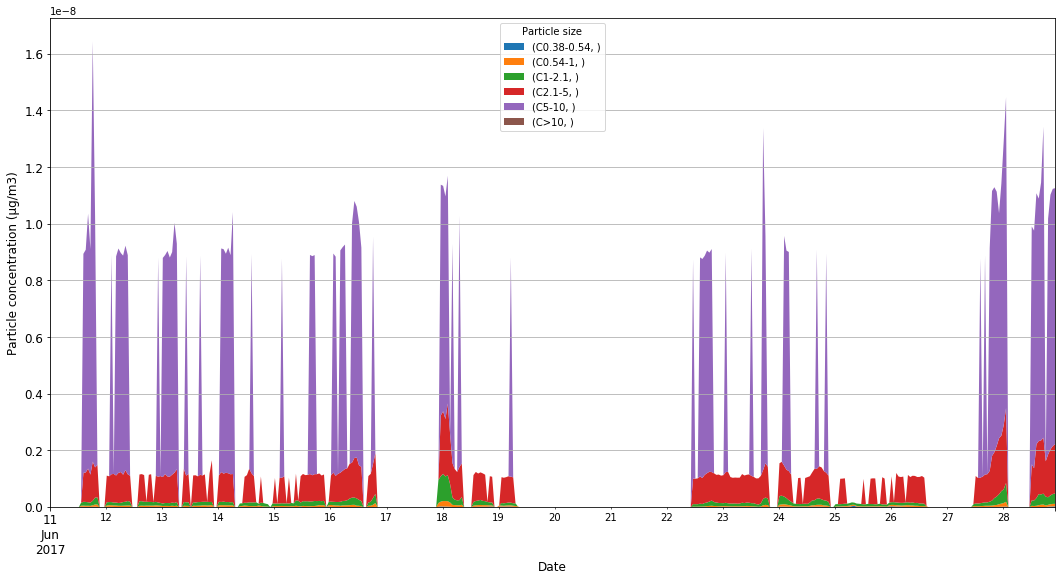

In [77]:
# To save the figure

fig3 = Hourly[['C0.38-0.54','C0.54-1','C1-2.1','C2.1-5','C5-10','C>10']].plot.area(linewidth=0)
fig3.set_xlabel('Date',fontsize=12)
fig3.set_ylabel('Particle concentration (μg/m3)', fontsize=12)
fig3.grid(True)
fig3.legend(title='Particle size')
fig3.tick_params(axis='x', labelsize=12 )
fig3.tick_params(axis='y', labelsize=12 )

plt.savefig('Fig3 - Particle concentrations during monitoring period @ ' + name)

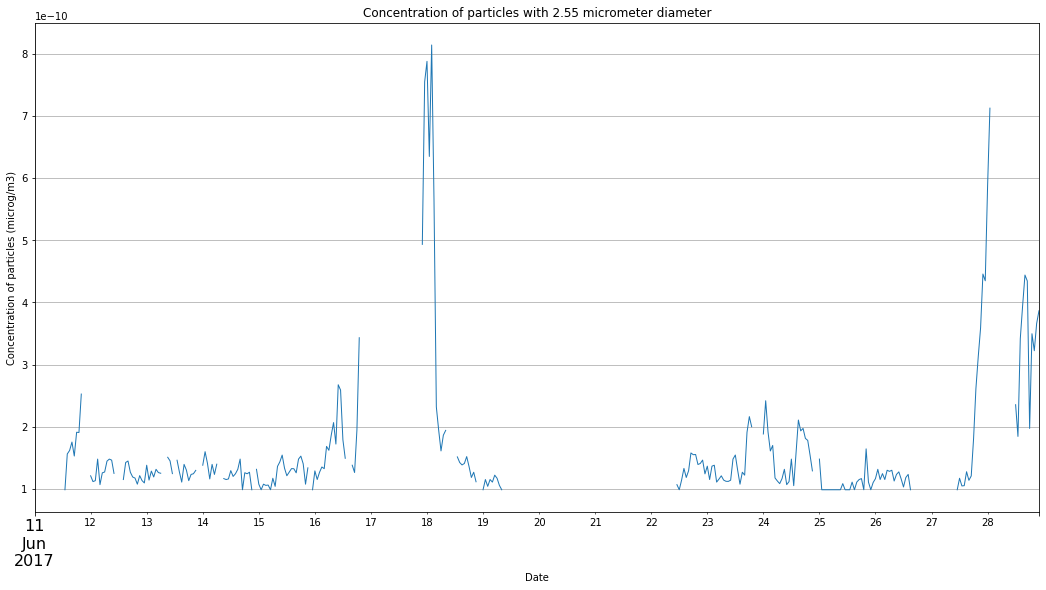

In [78]:
# Example of plot of the time series of concentration of particles with diameter equal to 2.55 micrometers:

fig4 = Hourly['C2.55'].plot(linewidth=1,title ='Concentration of particles with 2.55 micrometer diameter');
fig4.set_xlabel('Date')
fig4.set_ylabel('Concentration of particles (microg/m3)')
fig4.grid(True)
fig4.tick_params(axis='x', labelsize=16)


# To save the figure
plt.savefig('Fig4 - Concentration of particles with 255 micrometer diameter @ '+ name)

In [79]:
# Writing and saving file with all data

# This final csv file will have all the data produced:

selection = Hourly

output_selection = 'Hourly concentration particles OPC_all data.csv'

# Save dataframe to csv
selection.to_csv(output_selection, sep=',', index = True)

In [80]:
Hourly

,Timestamp,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,...,C11,C13,C15,C16.5,C0.38-0.54,C0.54-1,C1-2.1,C2.1-5,C5-10,C>10
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-11 00:00:00,2017-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 01:00:00,2017-06-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 02:00:00,2017-06-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 03:00:00,2017-06-11 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 04:00:00,2017-06-11 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,2017-06-28 18:00:00,13.00,8.000000,10.000000,12.000000,3.000000,4.000000,2.000000,2.000000,1.000000,...,7.919431e-09,NaN,NaN,NaN,7.528922e-12,5.563034e-11,3.137004e-10,1.249722e-09,NaN,NaN
2017-06-28 19:00:00,2017-06-28 19:00:00,39.75,12.604167,10.166667,5.395833,3.222222,4.229167,3.543478,1.891892,1.250000,...,7.919431e-09,NaN,2.008120e-08,NaN,2.302113e-11,6.420530e-11,2.666024e-10,1.509969e-09,8.326262e-09,NaN


In [81]:
Hourly_Conc = Hourly[['C0.38-0.54','C0.54-1','C1-2.1','C2.1-5','C5-10','C>10']]
Hourly_Conc

,C0.38-0.54,C0.54-1,C1-2.1,C2.1-5,C5-10,C>10
,,,,,,
Date,,,,,,
2017-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2017-06-28 18:00:00,7.528922e-12,5.563034e-11,3.137004e-10,1.249722e-09,NaN,NaN
2017-06-28 19:00:00,2.302113e-11,6.420530e-11,2.666024e-10,1.509969e-09,8.326262e-09,NaN


In [82]:
# Writing and saving file with all data

# This final csv file will have all the data produced:

selection2 = Hourly_Conc

output_selection2 = 'Hourly Conc particles_selected bins.csv'

# Save dataframe to csv
selection2.to_csv(output_selection2, sep=',', index = True)